In [52]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt 


In [54]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [55]:
# to normalize the data - if number data we can scale and normalize the data 
# in our case it the images which we are going to normalize 
# so we the min and the max value 
# the min -> 0 and max -> 255

X = X/255.0 

model = Sequential()

#layer 1
model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 2 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
# model.add(layers.Dense(1,activation = 'sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))




In [56]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
# model.fit(X,y,batch_size=40,validation_split=0.25)

In [57]:
history = model.fit(X,y,batch_size=40,epochs=30,validation_split=0.25)

Epoch 1/30
26/26 [==============================] - 4s 171ms/step - loss: 0.6335 - accuracy: 0.6298 - val_loss: 1.0688 - val_accuracy: 0.0262
Epoch 2/30
26/26 [==============================] - 4s 171ms/step - loss: 0.4733 - accuracy: 0.7578 - val_loss: 0.5530 - val_accuracy: 0.6890
Epoch 3/30
26/26 [==============================] - 5s 196ms/step - loss: 0.3083 - accuracy: 0.8740 - val_loss: 0.3971 - val_accuracy: 0.7878
Epoch 4/30
26/26 [==============================] - 5s 201ms/step - loss: 0.1879 - accuracy: 0.9293 - val_loss: 0.4295 - val_accuracy: 0.7587
Epoch 5/30
26/26 [==============================] - 7s 274ms/step - loss: 0.1453 - accuracy: 0.9419 - val_loss: 0.2576 - val_accuracy: 0.8837
Epoch 6/30
26/26 [==============================] - 7s 271ms/step - loss: 0.1139 - accuracy: 0.9583 - val_loss: 0.6656 - val_accuracy: 0.7180
Epoch 7/30
26/26 [==============================] - 6s 219ms/step - loss: 0.1019 - accuracy: 0.9622 - val_loss: 0.1796 - val_accuracy: 0.9419
Epoch 

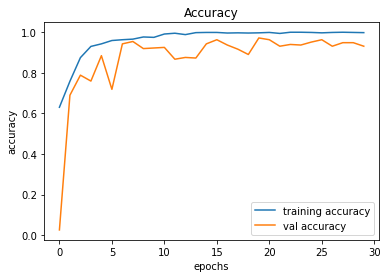

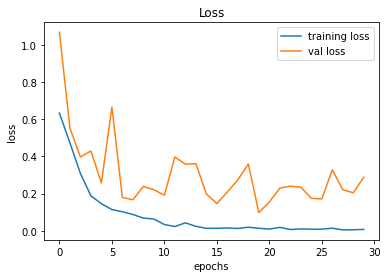

In [58]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()